# Objective:
# The objective of this project is to simulate the costs associated with managing an ATM cash balance over a 360-day period. The simulation takes into account the daily demand for cash withdrawals, the maximum cash capacity of the ATM, and the cost of reloading the ATM with cash.

In [1]:
# Import libraries:
# We begin by importing two essential libraries for data analysis: Pandas and NumPy. Pandas provides tools for manipulating and analyzing data, while NumPy is used for scientific computing and data analysis.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Define simulation parameters:
# We define several simulation parameters that will be used in the simulation.
# These parameters include the daily demand for cash withdrawals, the maximum cash capacity of the ATM, 
# and the maximum amount of cash that can be added to the ATM each time it is reloaded.

In [4]:
demand = 18000
atm = 700000
recharge = 700000

In [5]:
# Define cost parameters:
# We define several cost parameters that will be used to calculate the costs associated with managing the ATM cash balance. 
# These parameters include the fixed and variable costs associated with supplying the ATM with cash,
# the cost of freezing cash in the ATM, the variable cost associated with counting cash, and the fixed cost associated with a cash shortage.

In [6]:
supply_cost_fixed = 150
supply_cost_var = 0.0002
freeze_cost_var = 0.0196/360
count_cost_var = 0.0002
lackof_cost_fixed = 500

In [7]:
# Initialize cost dictionary:
# We initialize a dictionary called 'costs' to store the calculated costs for each level of cash recharge. 
# The dictionary contains four keys corresponding to the different types of costs: 'supply_cost', 'freeze_cost', 'count_cost', and 'lackof_cost'.

In [8]:
costs = {'supply_cost' : [0]*4,
        'freeze_cost' : [0]*4,
        'count_cost' : [0]*4,
        'lackof_cost' : [0]*4}

In [9]:
# Run simulation for different levels of cash recharge:
# We run the simulation for four different levels of cash recharge, ranging from 25% to 100% of the maximum cash capacity.
# For each level of recharge, we loop through 360 days of operation and calculate the costs associated with managing the ATM cash balance.

In [10]:
for i, recharge in enumerate([x*700000 for x in [.25,.5,.75,1]]):
    for day in range(360):
        # Subtract daily demand from ATM balance
        atm -= demand #atm = atm-demand
        
        # If ATM balance falls below daily demand, reload with cash and incur supply and count costs
        if atm <= demand:
            costs['supply_cost'][i] += supply_cost_fixed + supply_cost_var * recharge
            costs['count_cost'][i] += atm * count_cost_var
            atm = recharge
        
        # Increment freeze cost based on remaining balance and daily interest rate
        costs['freeze_cost'][i] += atm * freeze_cost_var
        
        # If ATM balance falls below zero, incur lack-of-cash cost
        if atm < 0:
            costs['lackof_cost'][i] += 500
        
# Create Pandas DataFrame to display calculated costs
df = pd.DataFrame(costs, index = [f"{round(x*100)}%" for x in np.linspace(0.25,1,4)])
print(df)

      supply_cost  freeze_cost  count_cost  lackof_cost
25%        6660.0  2536.403333        94.2            0
50%        4180.0  3692.912222        31.4            0
75%        3315.0  5417.984444         8.8            0
100%       2610.0  7020.992222        26.2            0


In [11]:
atm

52000

<AxesSubplot:>

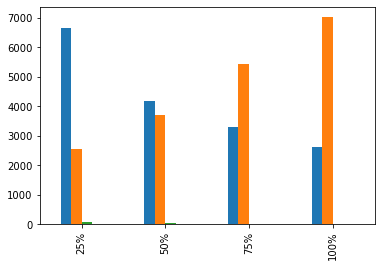

In [12]:
df.plot.bar(legend=False)

In [13]:
#Load the dataset

In [14]:
data = pd.read_csv('/Users/sebastian/Desktop/Sebastian/Studia/Big Data/Python na rynku bankowym/Pre_materials_SGH_Big_Data_Python_ATM/atm_daily_data.csv', sep=';')

In [15]:
#Preview the dataset
data

,Location,TimeStamp,Year,Month,MonthDay,DailyAmount,Weekday
0,CampusA,20100101,2010,1,1,1170,Tue
1,CampusA,20100102,2010,1,2,1660,Wed
2,CampusA,20100103,2010,1,3,870,Thu
3,CampusA,20100104,2010,1,4,1320,Fri
4,CampusA,20100105,2010,1,5,5,Sat
...,...,...,...,...,...,...,...
5395,DriveUp,20141226,2014,12,26,62540,Fri
5396,DriveUp,20141227,2014,12,27,26980,Sat
5397,DriveUp,20141228,2014,12,28,39030,Sun
5398,DriveUp,20141229,2014,12,29,32830,Mon


<AxesSubplot:>

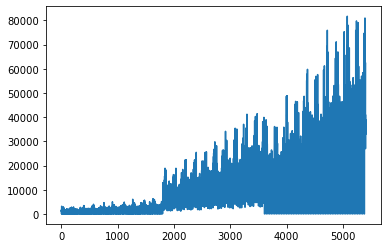

In [16]:
#Plot daily amount withdrawn from all locations in the dataset
data.DailyAmount.plot()

<AxesSubplot:>

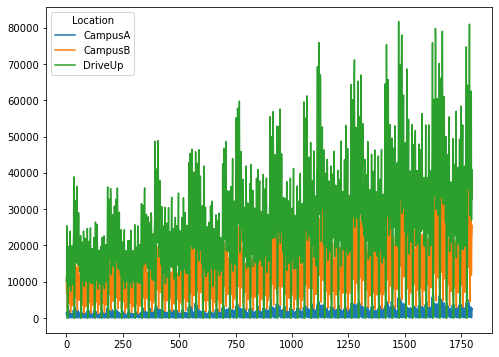

In [17]:
#Reshape the dataset to have locations as columns and dates as rows, then plot
data_temp = data.pivot(index='TimeStamp', columns='Location', values='DailyAmount')
data_temp.reset_index().loc[:,['CampusA', 'CampusB', 'DriveUp']].plot(figsize=[8,6])

In [18]:
data_temp

Location,CampusA,CampusB,DriveUp
TimeStamp,,,
20100101,1170,10660,10170
20100102,1660,6680,11810
20100103,870,7600,12490
20100104,1320,12950,25410
20100105,5,2850,0
...,...,...,...
20141226,1200,11790,62540
20141227,68,11760,26980
20141228,740,22140,39030


In [19]:
#Calculate the correlation between the different time lagged versions of the CampusA withdrawals
CampusA = data[data.Location == 'CampusA'].copy()

In [20]:
#Create columns for time lagged versions of CampusA daily amount withdrawn
for i in [1,7,30,180,360]:
    CampusA[f'DailyAmount{i}'] = CampusA.DailyAmount.shift(i)

In [21]:
#Compute correlation between time lagged versions of CampusA daily amount withdrawn
CampusA.iloc[:,5:].corr()

,DailyAmount,DailyAmount1,DailyAmount7,DailyAmount30,DailyAmount180,DailyAmount360
DailyAmount,1.000000,0.542393,0.644636,0.850365,0.893957,0.939033
DailyAmount1,0.542393,1.000000,0.378353,0.463243,0.490022,0.520776
DailyAmount7,0.644636,0.378353,1.000000,0.584354,0.600208,0.629324
DailyAmount30,0.850365,0.463243,0.584354,1.000000,0.875128,0.840262
DailyAmount180,0.893957,0.490022,0.600208,0.875128,1.000000,0.890080
DailyAmount360,0.939033,0.520776,0.629324,0.840262,0.890080,1.000000


In [22]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Train a linear regression model on the time lagged versions of CampusA daily amount withdrawn
CampusA = data[data.Location == 'CampusA'].copy()

#Create columns for time lagged versions of CampusA daily amount withdrawn
for i in [1,7,30,180,360]:
    CampusA[f'DailyAmount{i}'] = CampusA.DailyAmount.shift(i)

#Remove NaN values from the dataset
CampusA.dropna(inplace=True)

#Split the dataset into training and test sets based on the timestamp
CampusA_train = CampusA[CampusA.TimeStamp < 20140101]
CampusA_test = CampusA[CampusA.TimeStamp >= 20140101]

#Train a linear regression model on the time lagged versions of CampusA daily amount withdrawn
model_base = smf.ols(formula='DailyAmount ~ DailyAmount1 + DailyAmount7 + DailyAmount30 + \
                                DailyAmount180 + DailyAmount360', data = CampusA).fit()

#Evaluate the model's performance on the test set using mean absolute error
print(f"MAE: {mean_absolute_error(CampusA.DailyAmount, model_base.predict(CampusA.loc[:,['DailyAmount1', 'DailyAmount7', 'DailyAmount30', 'DailyAmount180', 'DailyAmount360']]))}")

MAE: 263.43838904975405


In [23]:
#Print summary of the model
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DailyAmount   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     2619.
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:01:31   Log-Likelihood:                -10587.
No. Observations:                1440   AIC:                         2.119e+04
Df Residuals:                    1434   BIC:                         2.122e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         16.0850     19.885      0.809      0.419     -22.922      55.092
DailyAmount1       0.0342      0.010      3.516      0.000       0.015       0.053
DailyAmount7       0.0437      0.011      4.075      0.000       0.023       0.065
DailyAmount30      0.1003      0.018      5.570      0.000       0.065       0.136
DailyAmount180     0.2229      0.023      9.681      0.000       0.178       0.268
DailyAmount360     0.7395      0.024     31.148      0.000       0.693       0.786
==============================================================================
Omnibus:                      128.248   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.132
Skew:                           0.379   Prob(JB):                    3.66e-102
Kurtosis:                       5.685   Cond. No.                     8.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#Simulate ATM operation based on the model predictions
predictions = model_base.predict(CampusA.loc[:,['DailyAmount1', 'DailyAmount7', 'DailyAmount30', 'DailyAmount180', 'DailyAmount360']])
capacity = 700000
atm = capacity

#Define fixed and variable costs for ATM operation
supply_cost_fixed = 150
supply_cost_var = 0.0002
freeze_cost_var = 0.0196/360
count_cost_var = 0.0002
lackof_cost_fixed = 500

#Initialize dictionary to store calculated costs
costs = {'supply_cost' : [0]*4,
        'freeze_cost' : [0]*4,
        'count_cost' : [0]*4,
        'lackof_cost' : [0]*4}

#Simulate ATM operation over 180 days for different levels of initial cash recharge
for i, recharge in enumerate([x*700000 for x in [.25,.5,.75,1]]):
    for j, day in enumerate (CampusA_test.index):
        atm -= CampusA_test.DailyAmount[day] 
        if atm < 0:
            costs['lackof_cost'][i] += 500   
        if atm <= predictions[day+1]:
            costs['supply_cost'][i] += supply_cost_fixed + supply_cost_var * recharge
            if atm > 0:
                costs['count_cost'][i] += atm * count_cost_var
            atm = recharge
        costs['freeze_cost'][i] += atm * freeze_cost_var
        if day == 1798:
            break

df = pd.DataFrame(costs, index = [f"{round(x*100)}%" for x in np.linspace(0.25,1,4)])
df['total'] = df.sum(axis=1)
print(df)

      supply_cost  freeze_cost  count_cost  lackof_cost        total
25%         185.0  6640.772802      0.4806            0  6826.253402
50%         440.0  3571.502418      0.5068          500  4512.009218
75%         510.0  5446.170714      0.3236          500  6456.494314
100%        290.0  6720.085672      0.6250            0  7010.710672


In [25]:
predictions = CampusA_train.DailyAmount.quantile(0.95)
capacity = 700000
atm = capacity

supply_cost_fixed = 150
supply_cost_var = 0.0002
freeze_cost_var = 0.0196/360
count_cost_var = 0.0002
lackof_cost_fixed = 500

costs = {'supply_cost' : [0]*4,
        'freeze_cost' : [0]*4,
        'count_cost' : [0]*4,
        'lackof_cost' : [0]*4}

for i, recharge in enumerate([x*700000 for x in [.25,.5,.75,1]]):
    for j, day in enumerate (CampusA_test.index):
        atm -= CampusA_test.DailyAmount[day] 
        if atm < 0:
            costs['lackof_cost'][i] += 500   
        if atm <= predictions:
            costs['supply_cost'][i] += supply_cost_fixed + supply_cost_var * recharge
            if atm > 0:
                costs['count_cost'][i] += atm * count_cost_var
            atm = recharge
        costs['freeze_cost'][i] += atm * freeze_cost_var
        if day == 1798:
            break

df = pd.DataFrame(costs, index = [f"{round(x*100)}%" for x in np.linspace(0.25,1,4)])
df['total'] = df.sum(axis=1)
print(df)

      supply_cost  freeze_cost  count_cost  lackof_cost        total
25%         185.0  6640.772802      0.4806            0  6826.253402
50%         440.0  3563.778221      0.5126          500  4504.290821
75%         510.0  5465.131319      0.8244            0  5975.955719
100%        290.0  6755.592706      0.3810            0  7045.973706


In [26]:
# The final result of this project provides insights into the costs associated with operating an Automated Teller Machine (ATM) under different levels of cash recharge and demand.
# The project simulates ATM operation over a period of 360 days and calculates various costs such as supply cost, freeze cost, count cost, and lack-of-cash cost.
# The simulation is followed by an analysis of the historical ATM daily data and a statistical model is built to predict the demand for the ATM.
# The statistical model is used to forecast the demand for the ATM and this information is used to calculate the costs of ATM operation under different levels of cash recharge and predicted demand.
# The results show that the total cost of ATM operation increases with the level of cash recharge, but decreases with an increase in predicted demand.
# This information can be used by the business to make informed decisions about the operational costs of an ATM, such as how much cash to load and when to reload,
# in order to optimize the operational costs of an ATM.